In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Source: The dataset was collected at the Faisalabad Institute of Cardiology and the Allied Hospital in
Faisalabad, Punjab, Pakistan, during the period of April to December in 2015. It was later made available on
Kaggle.


Description: The dataset comprises medical records of 299 patients diagnosed with heart failure. These records
include various clinical, body, and lifestyle information of the patients. The dataset encompasses 13 features,
providing insights into the patients' health status and potential risk factors for heart failure.

# features



*  Age: The age of the patient (numeric).

* Anaemia: Indicates the presence of anemia (binary: 0 for no, 1 for yes).

* Creatinine Phosphokinase (CPK): Level of creatinine phosphokinase enzyme in the blood (numeric).

* Diabetes: Indicates whether the patient has diabetes (binary: 0 for no, 1 for yes).

* Ejection Fraction: Percentage of blood leaving the heart at each contraction (numeric).

* High Blood Pressure: Indicates whether the patient has high blood pressure (binary: 0 for no, 1 for yes).

* Platelets: Platelet count in the blood (numeric).

* Serum Creatinine: Level of creatinine in the blood (numeric).

* Serum Sodium: Level of sodium in the blood (numeric).

* Sex: Gender of the patient (binary: 0 for female, 1 for male).

* Smoking: Indicates whether the patient smokes (binary: 0 for no, 1 for yes).

* Time: Follow-up period (in days) for the patient's condition (numeric).


In [3]:
df=pd.read_csv('/content/drive/MyDrive/ineuron assignments/heart_failure_clinical_records_dataset.csv')
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [4]:
# first we will do the basic cleaning and pre-processing of the dataset
df.info() # as we can check that the dataset doesn't have any categorical values


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [5]:
# we will replace the values in sex column
df['sex']=df['sex'].replace({1:'male',0:'female'})
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,male,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,male,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,male,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,male,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,female,0,8,1


In [6]:
# converting the age as integer as it cannot be a float value
df['age']=df['age'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    int64  
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    object 
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(2), int64(10), object(1)
memory usage: 30.5+ KB


In [7]:
# checking for null values
df.isnull().sum() # we do not have any null values in the dataset

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

now as we have done the basic cleaning we will move forward. We have not removed the duplicate values as we need it in this datasets to see how many people are affected by that and it will make the correlation process easy.

# questions
1)  What is the distribution of age among heart failure patients in the dataset



In [8]:
df['age'].min(), df['age'].max() # this it the age range of the patients

(40, 95)

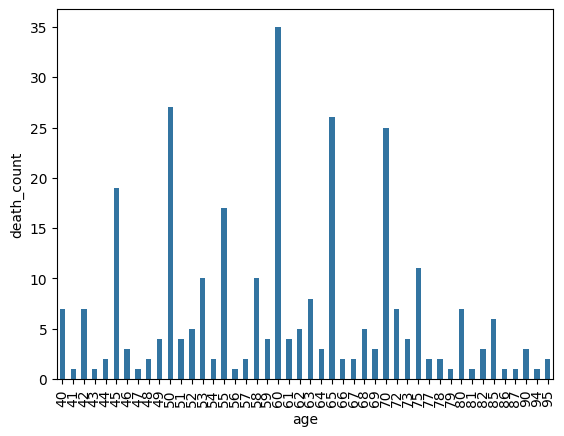

In [9]:
# creating a plot for visualization
sns.countplot(data=pd.DataFrame(df['age']), x=df['age'], width=0.5)
sns.set(rc={'figure.figsize':(15,15)})
plt.xlabel('age')
plt.ylabel('death_count')
plt.xticks(rotation=90)
plt.show()

as we can see that the minimum age for heart attack is 40 and the maximum age is 95 and the maximum number of people getting heart attacks are from the range `45 to 70`

2) How does the death rate vary with age?

<ipython-input-15-96bd9381285c>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(x=df['age'], data=df, palette='coolwarm')


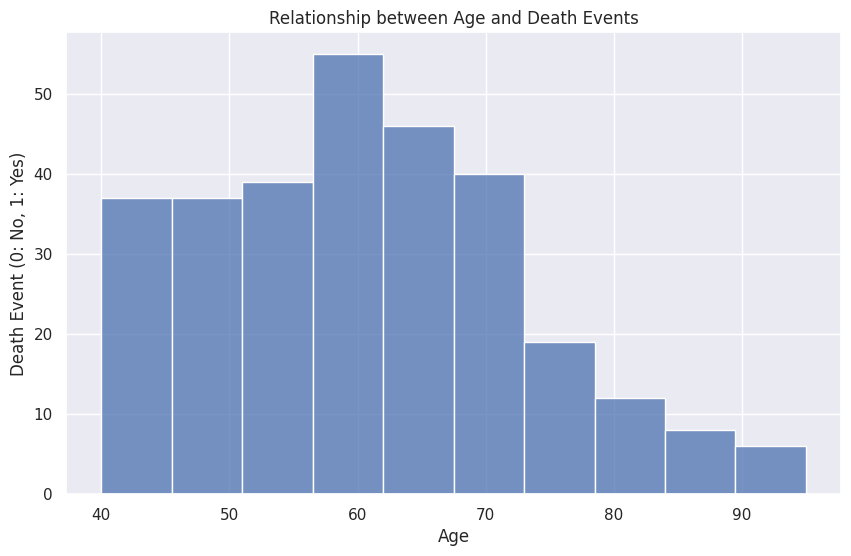

In [15]:
plt.figure(figsize=(10, 6))
sns.histplot(x=df['age'], data=df, palette='coolwarm')
plt.title('Relationship between Age and Death Events')
plt.xlabel('Age')
plt.ylabel('Death Event (0: No, 1: Yes)')
plt.show()

as we can see the death rate by heart attack is more in the middle aged people which is 45-65

 3) What is the percentage of male and female patients in the dataset?

In [ ]:
gender_counts = df['sex'].value_counts()

# Calculate the total number of patients
total_patients = df.shape[0]

# Calculate the percentage of male and female patients
male_percentage = round((gender_counts['male'] / total_patients) * 100,2)
female_percentage = round((gender_counts['female'] / total_patients) * 100,2)

print(f'the male and female percantage is {male_percentage} and {female_percentage} respectively')

the male and female percantage is 64.88 and 35.12 respectively


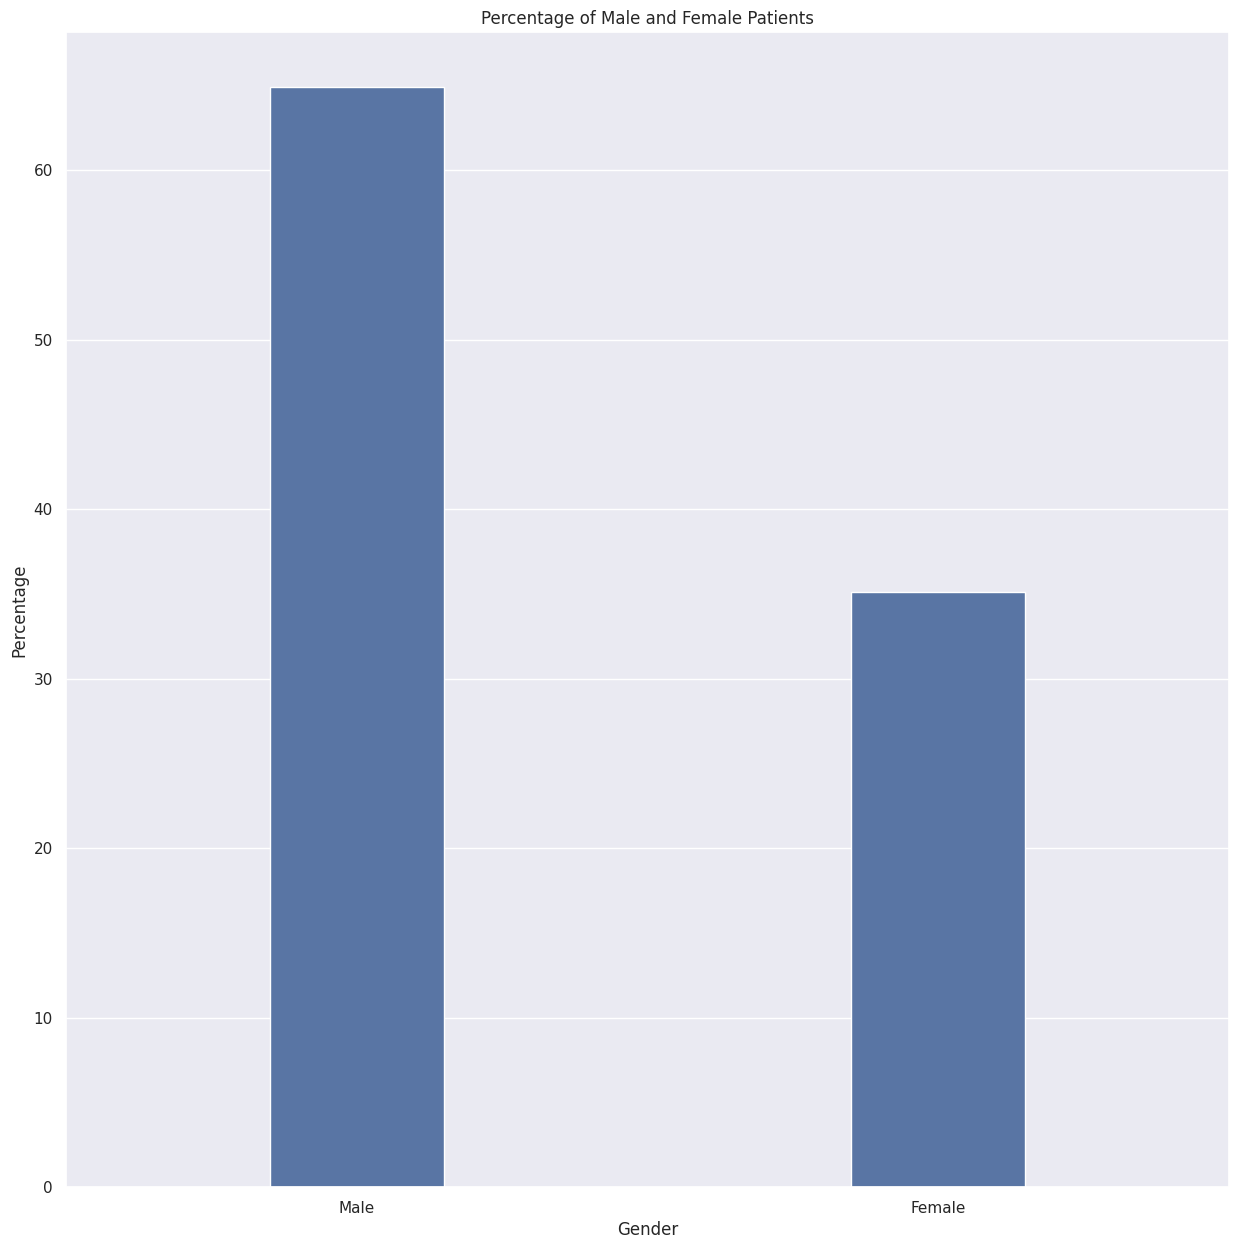

In [ ]:
# we can see it through visulaization too
percentage_data = pd.DataFrame({'gender': ['Male', 'Female'],
                                'percentage': [male_percentage, female_percentage]})

# Create a bar plot
sns.barplot(x='gender', y='percentage', data=percentage_data, width=0.3)
sns.set(rc={'figure.figsize':(15,5)})
plt.title('Percentage of Male and Female Patients')
plt.ylabel('Percentage')
plt.xlabel('Gender')
plt.show()

We can see there are more number of patient from male category

4) How does the platelate count vary among age group?

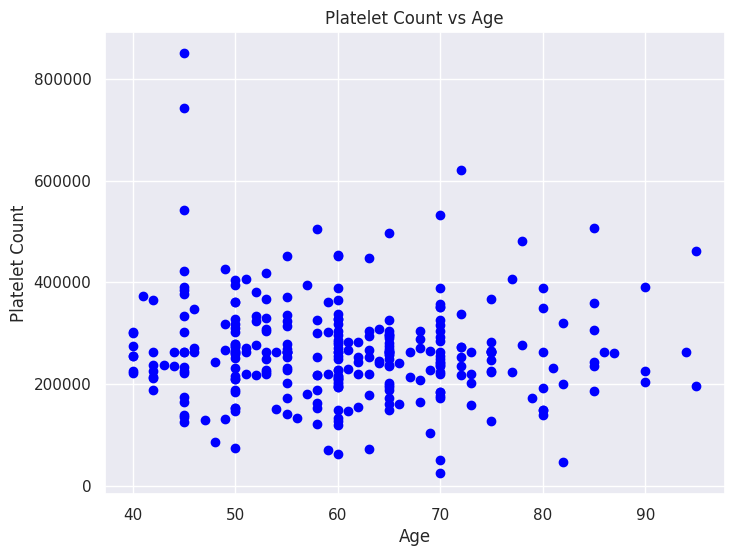

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(df['age'], df['platelets'], color='blue')
plt.title('Platelet Count vs Age')
plt.xlabel('Age')
plt.ylabel('Platelet Count')
plt.grid(True)
plt.show()

As we can see both the features doesn't have much in common and does not vary much with respect to other feature

5) is there a correlation between  creatinine and sodium levels in the blood

In [ ]:
corr=df.corr(method='pearson')
corr

<ipython-input-14-396bee140f22>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=df.corr(method='pearson')


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,smoking,time,DEATH_EVENT
age,1.000000,0.087574,-0.081406,-0.101454,0.060195,0.093170,-0.052475,0.159237,-0.045912,0.018926,-0.224265,0.253581
anaemia,0.087574,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.107290,-0.141414,0.066270
creatinine_phosphokinase,-0.081406,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.002421,-0.009346,0.062728
diabetes,-0.101454,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.147173,0.033726,-0.001943
ejection_fraction,0.060195,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.067315,0.041729,-0.268603
high_blood_pressure,0.093170,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.055711,-0.196439,0.079351
platelets,-0.052475,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,0.028234,0.010514,-0.049139
serum_creatinine,0.159237,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,-0.027414,-0.149315,0.294278
serum_sodium,-0.045912,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,0.004813,0.087640,-0.195204
smoking,0.018926,-0.107290,0.002421,-0.147173,-0.067315,-0.055711,0.028234,-0.027414,0.004813,1.000000,-0.022839,-0.012623


As we can see there is no correlation between creatinine and sodium

6) How does the prevalence of high blood pressure differ between male and female patients?

In [ ]:
blood_pressure_count_male=0
blood_pressure_count_female=0
for index, row in df.iterrows():
  if row['sex']=='male' and row['high_blood_pressure']==1:
    blood_pressure_count_male += 1
  elif row['sex']=='female' and row['high_blood_pressure']==1:
    blood_pressure_count_female +=1
  else:
    pass

print(f'the prevalance of blood in male is {blood_pressure_count_male}')
print(f'the prevalance of blood in female is {blood_pressure_count_female}')


the prevalance of blood in male is 61
the prevalance of blood in female is 44


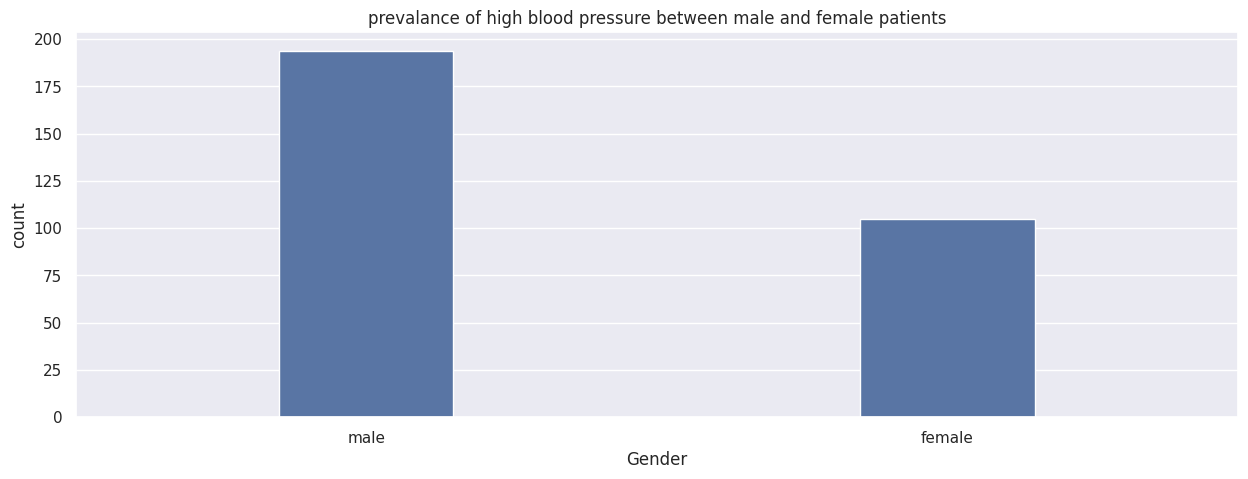

In [ ]:
sns.countplot(data=pd.DataFrame(df['high_blood_pressure']), x=df['sex'], width=0.3)
sns.set(rc={'figure.figsize':(15,5)})
plt.title('prevalance of high blood pressure between male and female patients')
plt.xlabel('Gender')
plt.show()

as we can see the prevalance of high blood pressure is more in males than females

7) What is the relationship between smoking habits and the occurrence of heart failure?


`sns.regplot()` creates a scatter plot with a regression line. It takes the DataFrame df and the names of the variables to be plotted as arguments.

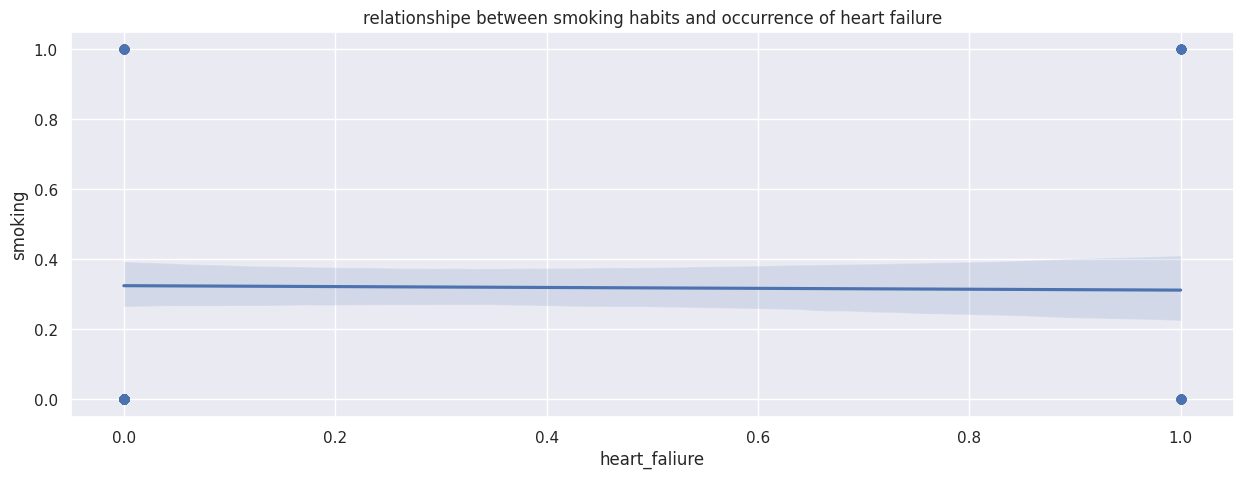

In [ ]:
sns.regplot(x=df['DEATH_EVENT'], y=df['smoking'], data=df) # here i have taken heart_faliure as death event as we don't have any heart_faliure cloumn
plt.title('relationshipe between smoking habits and occurrence of heart failure')
plt.xlabel('heart_faliure')
plt.ylabel('smoking')
plt.show()

as we can see there is no relationship between these two.

8) Are there any noticeable patterns in the distribution of death events across different age groups?


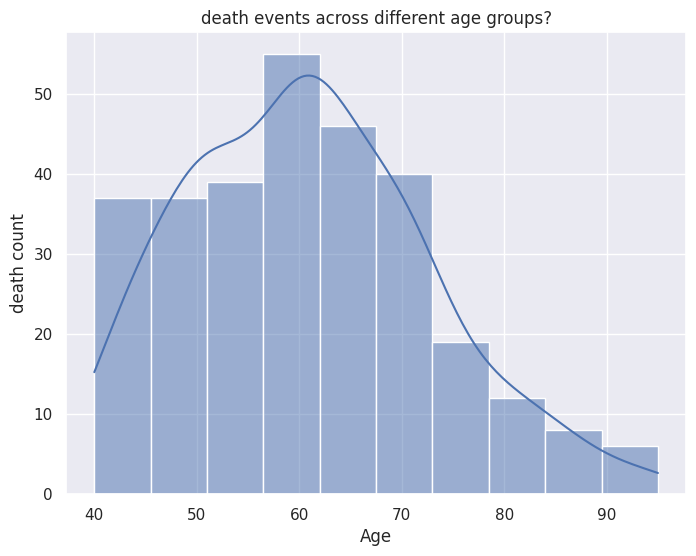

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x=df['age'], bins=10, kde=True)
plt.title('death events across different age groups?')
plt.xlabel('Age')
plt.ylabel('death count')
plt.grid(True)
plt.show()

As we can see through the histogram plot that the increase in death rate starts from the age of 40 and it starts to fall rapidly after the age of 70 we can there were more deaths between the age of 50-70

9) Is there any significant difference in ejection fraction between patients with and without diabetes


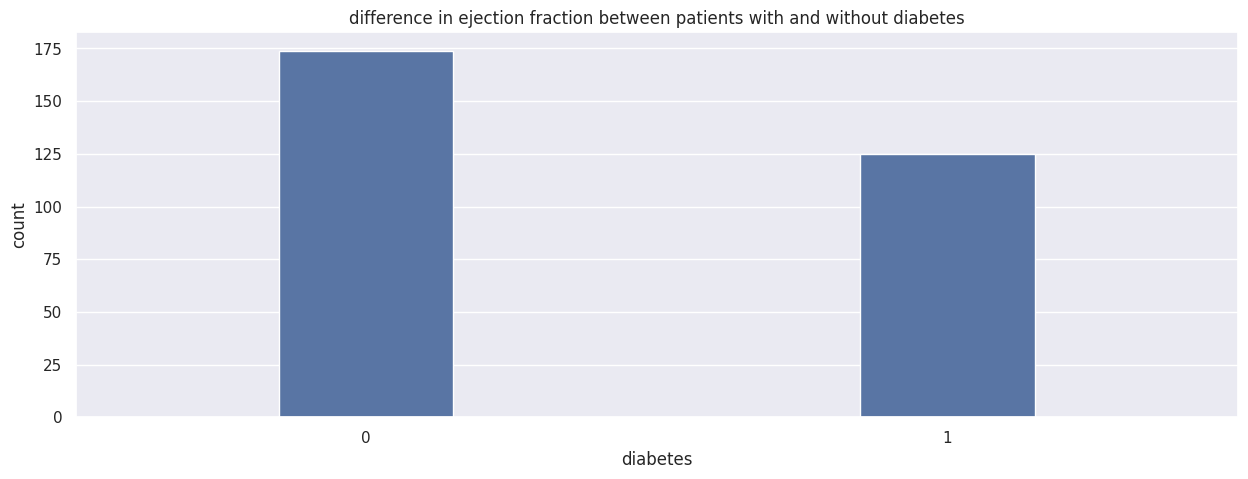

In [ ]:
sns.countplot(data=pd.DataFrame(df['ejection_fraction']), x=df['diabetes'], width=0.3)
sns.set(rc={'figure.figsize':(15,5)})
plt.title('difference in ejection fraction between patients with and without diabetes')
plt.xlabel('diabetes')
plt.show()

we can say there is a difference in the ejection fraction between the diabetic and non-diabetic patients as the ejection is more in non-diabetic patients compare to the diabitec patients

10) How does the serum creatinine level vary between patients who survived and those who did not?

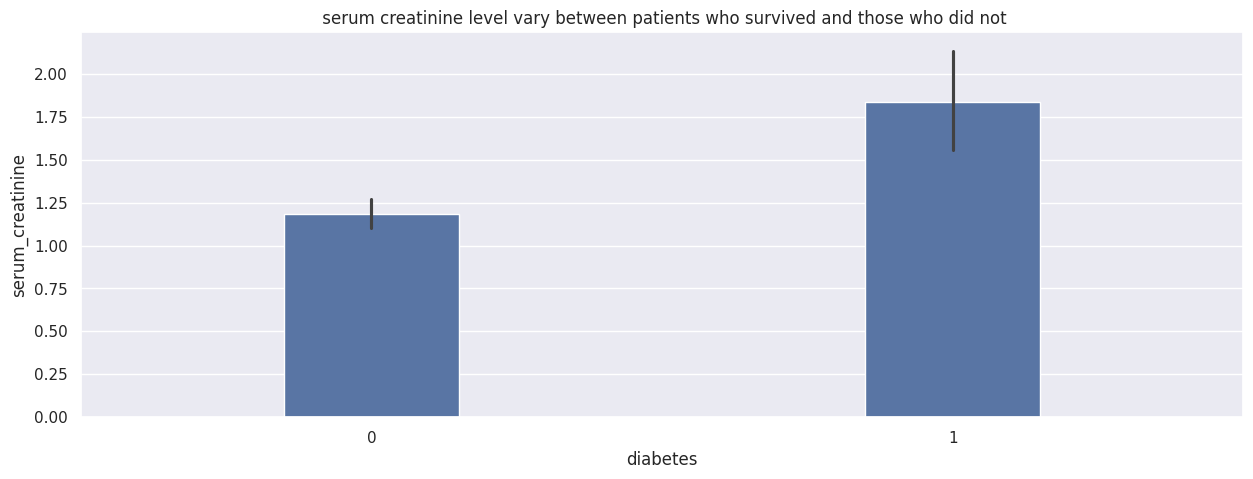

In [ ]:
sns.barplot(data=df, y=df['serum_creatinine'], x=df['DEATH_EVENT'], width=0.3)
sns.set(rc={'figure.figsize':(15,5)})
plt.title(' serum creatinine level vary between patients who survived and those who did not')
plt.xlabel('diabetes')
plt.show()

we can say that the people who survived mostly were whose serum creatinine level were less we can see it through the chart as well

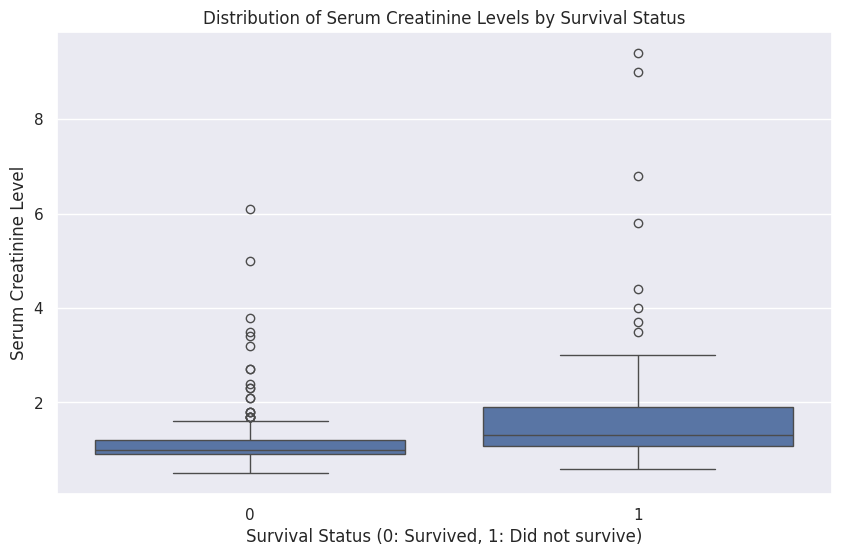

In [16]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='DEATH_EVENT', y='serum_creatinine', data=df)
plt.title('Distribution of Serum Creatinine Levels by Survival Status')
plt.xlabel('Survival Status (0: Survived, 1: Did not survive)')
plt.ylabel('Serum Creatinine Level')
plt.show()


We can see through this boxplot that the median serum creatinine level for the people who survived is less than the people who did not survive.